<a href="https://colab.research.google.com/github/khou128/QM2/blob/main/Critics_Avatar_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Word frequency try-out:

In [2]:
import pandas as pd

In [3]:
from google.colab import files


uploaded = files.upload()


Saving critics for Avatar.csv to critics for Avatar.csv


In [4]:
df = pd.read_csv('critics for Avatar.csv')

In [5]:
print(df)

          display-name          publication  \
0         Brian Eggert    Deep Focus Review   
1            Zach Pope    Zach Pope Reviews   
2     Douglas Davidson  Elements of Madness   
3         Allison Rose          FlickDirect   
4         Matt Brunson          Film Frenzy   
..                 ...                  ...   
307     Kirk Honeycutt   Hollywood Reporter   
308  Chris Hewitt (UK)      Empire Magazine   
309          Anna Keir     Independent (UK)   
310          Wendy Ide           Times (UK)   
311          The Sneak         The Sun (UK)   

                                           review-text  \
0    To be sure, this is an engaging experience in ...   
1    STUNNING epic.  Zoe Saldana performance… A fan...   
2    It’s the world of Pandora married to the groun...   
3    Cameron is a master filmmaker whose movies wil...   
4    While the visuals might rate four stars, the s...   
..                                                 ...   
307  The screen is alive with

In [6]:
df_sorted = df.sort_values(by='review-text', ascending=True)
df_sorted

,display-name,publication,review-text,original-score-and-url,original-score-and-url 2
44,Paul Chambers,CNNRadio,"""Avatar"" looks amazing on Blu-ray. If the plot...",| Original Score: 5\n \n ...,"Nov 20, 2010"
278,Cole Smithey,ColeSmithey.com,"""Avatar"" may well be a perfect film to desensi...",| Original Score: B-\n \n ...,"Dec 11, 2009"
64,Christopher Smith,Bangor Daily News (Maine),"""The year's most ambitious film is so breathta...",| Original Score: A-\n \n ...,"Feb 13, 2010"
147,James Rocchi,MSN Movies,"'Avatar' is a very big, very enjoyable, summer...",| Original Score: 3.5/5\n \n ...,"Dec 18, 2009"
217,Greg Maki,"Star-Democrat (Easton, MD)",... The kind of experience that defines the te...,| Original Score: 4/4\n \n ...,"Dec 16, 2009"
...,...,...,...,...,...
15,Casey Chong,Casey's Movie Mania,[W]atching Avatar‘s 4K HDR format on IMAX 3D l...,| Original Score: 4.5/5\n \n ...,"Sep 25, 2022"
132,Andrea Chase,Killer Movie Reviews,a bold and imaginative vision brought low by a...,| Original Score: 3/5\n \n ...,"Dec 18, 2009"
197,Bill Gibron,Filmcritic.com,a stunning masterpiece.,Full Review\n \n ...,"Dec 17, 2009"
88,James Kendrick,Q Network Film Desk,"as grand in scope, ambitious in production, an...",| Original Score: 3.5/4\n \n ...,"Dec 27, 2009"


In [7]:
print(df_sorted['review-text'])

44     "Avatar" looks amazing on Blu-ray. If the plot...
278    "Avatar" may well be a perfect film to desensi...
64     "The year's most ambitious film is so breathta...
147    'Avatar' is a very big, very enjoyable, summer...
217    ... The kind of experience that defines the te...
                             ...                        
15     [W]atching Avatar‘s 4K HDR format on IMAX 3D l...
132    a bold and imaginative vision brought low by a...
197                              a stunning masterpiece.
88     as grand in scope, ambitious in production, an...
35                                                   NaN
Name: review-text, Length: 312, dtype: object


In [8]:
df1=df_sorted['review-text']

<ipython-input-14-3ad5f66595d5>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('rainbow', len(top_words))


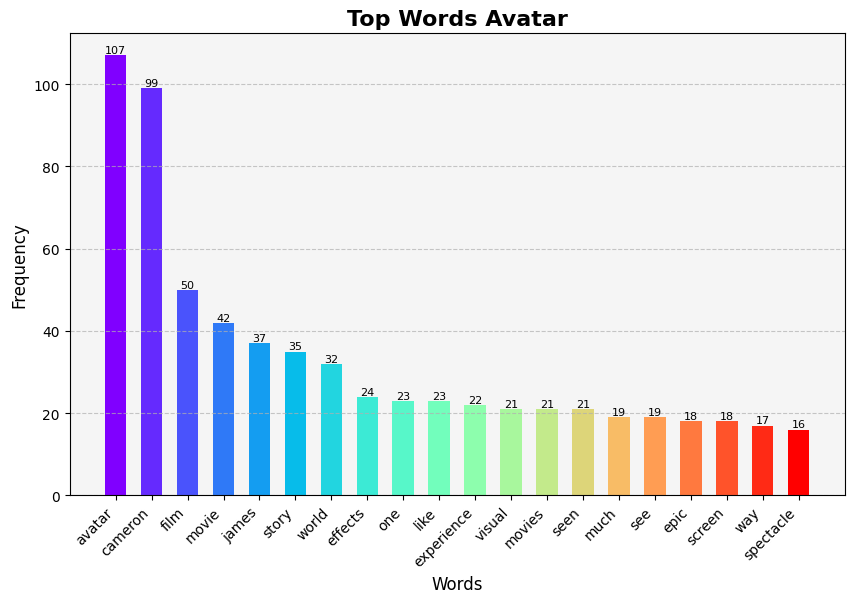

In [14]:
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from matplotlib import cm

# Assuming 'text_column' is the column containing text data
text_data = ' '.join(df['review-text'].dropna())

# Tokenize the text into words
words = word_tokenize(text_data)

# Remove stopwords
stop_words = set(stopwords.words('english'))
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Calculate word frequencies
freq_dist = FreqDist(words)

# Visualize the top N words
top_words = freq_dist.most_common(20)  # Change 10 to the desired number of top words

# Choose a rainbow-like colormap
colormap = cm.get_cmap('rainbow', len(top_words))

# Create a bar plot with rotated x-axis labels and rainbow-like colors
plt.figure(figsize=(10, 6))
bars = plt.bar(*zip(*top_words), color=colormap(range(len(top_words))), width=0.6, align='center')
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top Words Avatar', fontsize=16, fontweight='bold')

# Increase the width and rotation of x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adding a baby pink background color
plt.gca().set_facecolor('#F5F5F5')  # Baby Pink

# Adding grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding data labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=8)

plt.show()


In [ ]:
#Now for sentiment analysis
%%capture
!pip install spacy
!pip install scattertext
!pip install tika
!pip install spacytextblob

In [ ]:
import spacy
import json
import pylab
from IPython.core.display import display, HTML
import nltk
from tika import parser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from spacytextblob.spacytextblob import SpacyTextBlob

%matplotlib inline
pylab.rcParams['figure.figsize'] = (10., 8.)
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

In [ ]:

text_of_77th_row = df.loc[76, 'review-text']

# apply the NLP pipeline to this text.
doc = nlp(text_of_77th_row)

print(text_of_77th_row)
print('Polarity: ', doc._.blob.polarity)
print('Subjectivity: ', doc._.blob.subjectivity)
print('Assessments: ', doc._.blob.sentiment_assessments.assessments)

Worthington and Saldana provide enough wattage to keep the film's human center alive and beating, while Cameron wraps their story in an armature of generally impressive 3D attractions as well as a righteousness that's touching yet all too simplistic
Polarity:  0.14285714285714285
Subjectivity:  0.4428571428571429
Assessments:  [(['enough'], 0.0, 0.5, None), (['human'], 0.0, 0.1, None), (['center'], -0.1, 0.1, None), (['alive'], 0.1, 0.4, None), (['generally', 'impressive'], 1.0, 1.0, None), (['touching'], 0.5, 0.5, None), (['simplistic'], -0.5, 0.5, None)]


In [16]:
from google.colab import files


uploaded = files.upload()

Saving tmdb_5000_movies.csv to tmdb_5000_movies.csv


In [18]:
df1 = pd.read_csv('tmdb_5000_movies.csv')
df1

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [22]:
df1 = df1.drop(columns=[ 'production_companies', 'production_countries', 'revenue', 'runtime', 'spoken_languages', 'status'])
df1

KeyError: ignored

In [23]:
df1


,genres,keywords,original_title,overview,release_date,tagline,title,vote_average,vote_count
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...",2009-12-10,Enter the World of Pandora.,Avatar,7.2,11800
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",2007-05-19,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",Spectre,A cryptic message from Bond’s past sends him o...,2015-10-26,A Plan No One Escapes,Spectre,6.3,4466
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",The Dark Knight Rises,Following the death of District Attorney Harve...,2012-07-16,The Legend Ends,The Dark Knight Rises,7.6,9106
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",John Carter,"John Carter is a war-weary, former military ca...",2012-03-07,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...
4798,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 5616, ""name"": ""united states\u2013mexi...",El Mariachi,El Mariachi just wants to play his guitar and ...,1992-09-04,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",[],Newlyweds,A newlywed couple's honeymoon is upended by th...,2011-12-26,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...","Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",2013-10-13,NaN,"Signed, Sealed, Delivered",7.0,6
4801,[],[],Shanghai Calling,When ambitious New York attorney Sam is sent t...,2012-05-03,A New Yorker in Shanghai,Shanghai Calling,5.7,7
